In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt #para graficar dando especificaciones del gráfico

# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

#IMPORTAR LIBRERIAS NECESARIAS
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('df-clean.csv')
df.sample(7).transpose()

,2211,8437,690,4288,3289,4080,8672
Unnamed: 0,2211,8454,690,4288,3289,4080,8689
show_id,s2212,s8455,s691,s4289,s3290,s4081,s8690
type,Movie,Movie,Movie,TV Show,Movie,Movie,Movie
title,Romance Doll,The Pink Panther,Rurouni Kenshin: The Final,Ashes of Love,Jeff Garlin: Our Man In Chicago,Zach Galifianakis: Live at the Purple Onion,Waiting...
director,Yuki Tanada,Shawn Levy,Keishi Otomo,Director_Unkown,Christopher Storer,Michael Blieden,Rob McKittrick
cast,"Issey Takahashi, Yuu Aoi, Kenta Hamano, Toko M...","Steve Martin, Kevin Kline, Beyoncé Knowles-Car...","Takeru Sato, Emi Takei, Mackenyu, Munetaka Aok...","Yang Zi, Deng Lun, Luo Yunxi",Jeff Garlin,"Zach Galifianakis, Brian Unger","Ryan Reynolds, Anna Faris, Justin Long, David ..."
country,Japan,"United States, Czech Republic",Country_Unknown,China,United States,United States,United States
date_added,"July 24, 2020","July 1, 2019","June 18, 2021","December 16, 2018","November 12, 2019","February 26, 2019","September 23, 2020"
release_year,2020,2006,2021,2018,2019,2006,2005
rating,TV-MA,PG,TV-14,TV-14,TV-MA,TV-MA,R


In [3]:
temp=df.drop(columns=['description', 'Unnamed: 0','show_id'])

In [4]:
target='type'
X=temp.drop(columns=[target])
y=temp[target]

In [5]:
y.value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [7]:
numeric_cols=X.select_dtypes(include=['int32','int64','float64']).columns
categorical_cols=X.select_dtypes(include=['object']).columns


In [8]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformador para features categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [10]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['release_year'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['title', 'director', 'cast', 'country', 'date_added', 'rating',
       'duration', 'listed_in'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [11]:
y_pred = pipeline.predict(X_test)
#y_test.shape

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1225
     TV Show       0.99      0.99      0.99       533

    accuracy                           1.00      1758
   macro avg       0.99      1.00      0.99      1758
weighted avg       1.00      1.00      1.00      1758



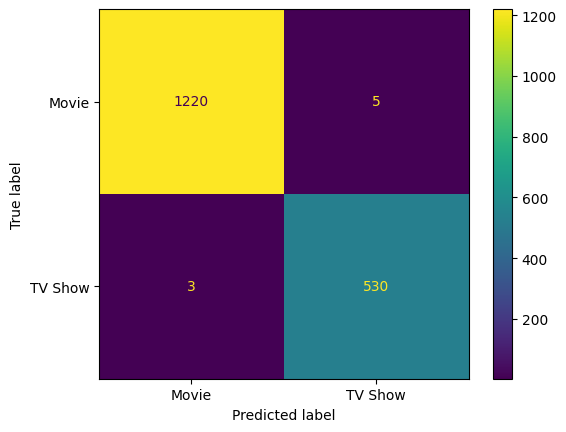

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=pipeline.classes_)
disp.plot()
#plt.figure(figsize=(150,200))
plt.show()

In [24]:
#X.dtypes

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Columnas numéricas:", numeric_features)
print("Columnas categóricas:", categorical_features)

Columnas numéricas: ['release_year']
Columnas categóricas: ['title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in']


In [25]:

from sklearn.model_selection import train_test_split, GridSearchCV  #se añade GridSearchCV
from sklearn.preprocessing import MinMaxScaler


# Partición en entrenamiento, validación y prueba#X.dtypes

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Columnas numéricas:", numeric_features)
print("Columnas categóricas:", categorical_features)

x_train, x_resto, y_train, y_resto = train_test_split(
    X, y, test_size=0.4, random_state=123
)

x_val, x_test, y_val, y_test = train_test_split(
    x_resto, y_resto, test_size=0.5, random_state=321
)

# Preprocesador con diferentes transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(feature_range=(-1, 1)), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pipeline con preprocesamiento
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

 #Grid de hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_leaf': [1, 3]
}
#Envoltura del pipeline en GridSearchCV 
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,                # 5-fold CV sobre el train
    scoring='accuracy',
    n_jobs=-1
)

# Entrenar (usa x_train, no toca val/test)
grid.fit(x_train, y_train)

# Evaluar con el mejor modelo seleccionado
print("Mejores hiperparámetros:", grid.best_params_)
print("Accuracy en test:", grid.score(x_test, y_test))

#Generar predicciones con el mejor estimador
print("Predicciones:", grid.predict(x_test))

Columnas numéricas: ['release_year']
Columnas categóricas: ['title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in']
Mejores hiperparámetros: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Accuracy en test: 0.9977246871444824
Predicciones: ['TV Show' 'TV Show' 'TV Show' ... 'Movie' 'Movie' 'Movie']


In [26]:
# 1. Obtener el mejor modelo
best_model = grid.best_estimator_

# 2. Evaluar en VALIDATION set (para ajuste final)
val_accuracy = best_model.score(x_val, y_val)
print(f"Accuracy en Validation: {val_accuracy:.4f}")

# 3. Evaluar en TEST set (evaluación final)
test_accuracy = best_model.score(x_test, y_test)
print(f"Accuracy en Test: {test_accuracy:.4f}")

# 4. Comparar con el baseline
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)
baseline_accuracy = dummy.score(x_test, y_test)
print(f"Accuracy Baseline (clase mayoritaria): {baseline_accuracy:.4f}")

Accuracy en Validation: 0.9989
Accuracy en Test: 0.9977
Accuracy Baseline (clase mayoritaria): 0.6906


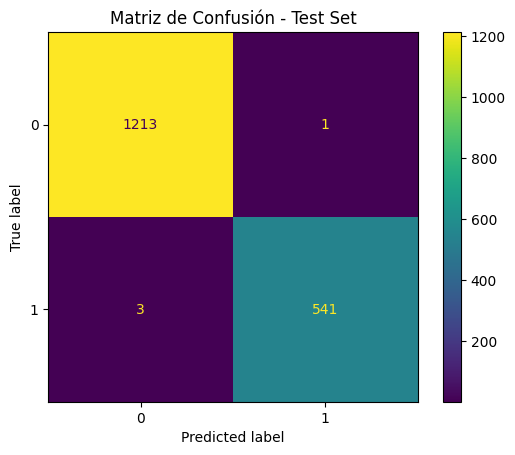


REPORTE DE CLASIFICACIÓN COMPLETO
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1214
     TV Show       1.00      0.99      1.00       544

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



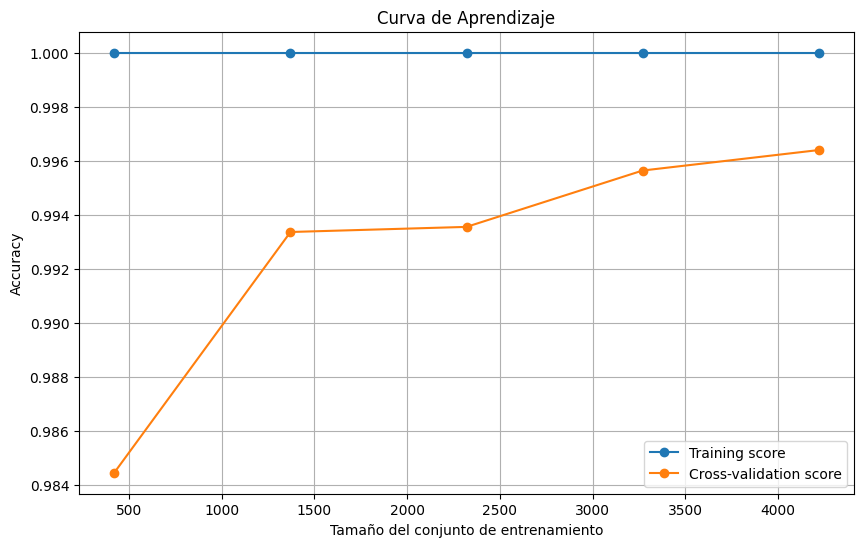

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


y_pred = best_model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión - Test Set")
plt.show()

# Reporte de clasificación completo
print("\n" + "="*50)
print("REPORTE DE CLASIFICACIÓN COMPLETO")
print("="*50)
print(classification_report(y_test, y_pred))
# Curva de aprendizaje (opcional pero muy útil)
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
    best_model, x_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Top 10 características más importantes:
                                                 feature  importance
6003                            director_Director_Unkown    0.237104
14992                                  duration_1 Season    0.217385
15095                                 duration_2 Seasons    0.039132
15117                                 duration_3 Seasons    0.019602
15543                                 listed_in_Kids' TV    0.016892
0                                           release_year    0.012191
14983                                           rating_R    0.010241
15425                               listed_in_Docuseries    0.008795
15388  listed_in_Crime TV Shows, International TV Sho...    0.008224
15533        listed_in_International TV Shows, TV Dramas    0.007461


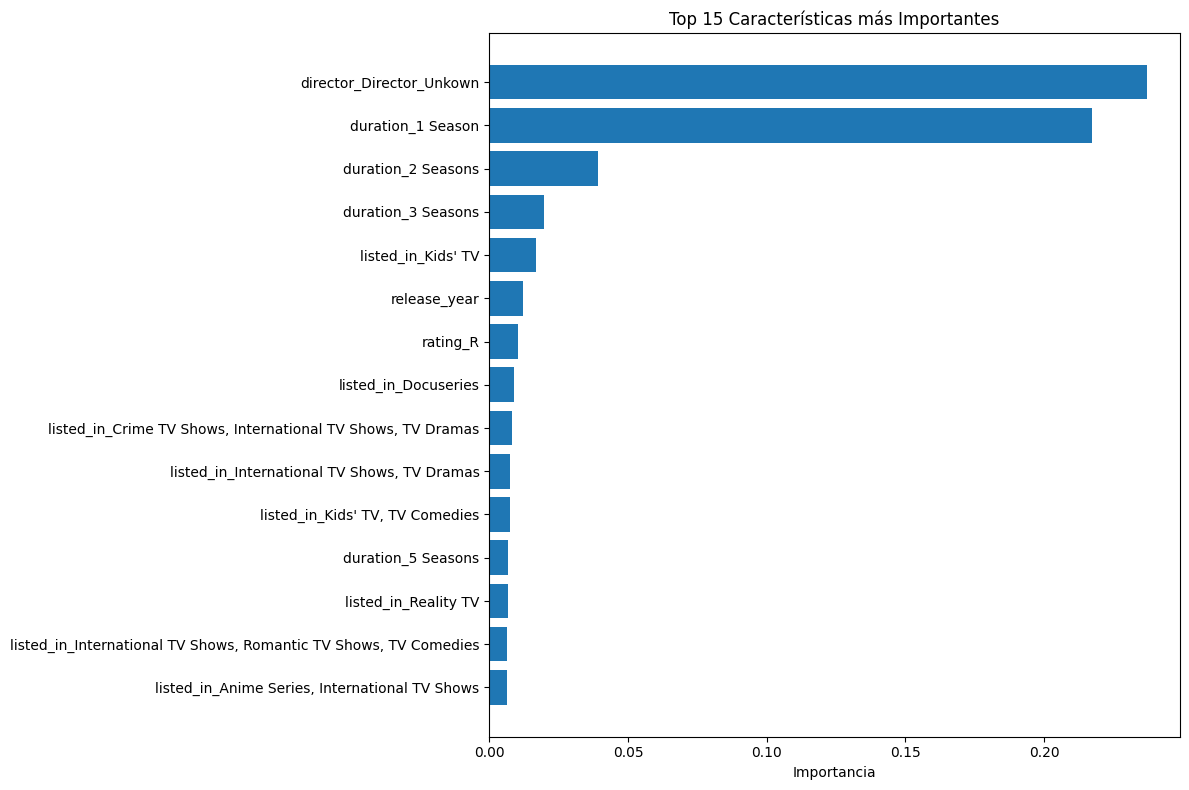

In [30]:
# Importancia de features (solo si usas RandomForest)
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    # Obtener nombres de features después del preprocesamiento
    feature_names = []
    
    # Para variables numéricas
    if 'num' in best_model.named_steps['preprocessor'].named_transformers_:
        feature_names.extend(numeric_features)
    
    # Para variables categóricas (OneHotEncoder)
    if 'cat' in best_model.named_steps['preprocessor'].named_transformers_:
        ohe = best_model.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = ohe.get_feature_names_out(categorical_features)
        feature_names.extend(cat_features)

    # Obtener importancias
    importances = best_model.named_steps['classifier'].feature_importances_
    
    # Crear DataFrame con importancias
    feat_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 características más importantes:")
    print(feat_imp_df.head(10))
    
    # Gráfico de importancias
    plt.figure(figsize=(12, 8))
    plt.barh(feat_imp_df['feature'][:15], feat_imp_df['importance'][:15])
    plt.title('Top 15 Características más Importantes')
    plt.xlabel('Importancia')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [32]:
print("="*60)
print("REPORTE FINAL DEL MODELO")
print("="*60)
print(f"Mejores hiperparámetros: {grid.best_params_}")
print(f"Mejor score en CV: {grid.best_score_:.4f}")
print(f"Accuracy en Validation: {val_accuracy:.4f}")
print(f"Accuracy en Test: {test_accuracy:.4f}")
print(f"Mejora sobre baseline: {test_accuracy - baseline_accuracy:.4f}")

# Verificar overfitting
train_accuracy = best_model.score(x_train, y_train)
print(f"Accuracy en Train: {train_accuracy:.4f}")
print(f"Diferencia Train-Test: {train_accuracy - test_accuracy:.4f}")

if (train_accuracy - test_accuracy) > 0.1:
    print("POSIBLE OVERFITTING: Diferencia grande entre train y test")
else:
    print("Buen balance: diferencia aceptable entre train y test")

REPORTE FINAL DEL MODELO
Mejores hiperparámetros: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
Mejor score en CV: 0.9962
Accuracy en Validation: 0.9989
Accuracy en Test: 0.9977
Mejora sobre baseline: 0.3072
Accuracy en Train: 1.0000
Diferencia Train-Test: 0.0023
Buen balance: diferencia aceptable entre train y test
